In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Bike Details EDA
# 15 questions

In [115]:
df=pd.read_csv("BIKE DETAILS.csv")

In [116]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [118]:
df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [119]:
# 1. range of selling prices
price_range = df['selling_price'].max() - df['selling_price'].min()
price_range

755000

In [120]:
# 2. median selling price
median_price = df['selling_price'].median()
median_price

45000.0

In [121]:
#3. Most common seller type:
common_seller_type = df['seller_type'].mode()[0]
common_seller_type

'Individual'

In [122]:
# 4. How many bikes have driven more than 50,000 kilometers?
count_high_km = df[df['km_driven'] > 50000].shape[0]
print(f"Bikes with >50,000 km: {count_high_km}")

Bikes with >50,000 km: 170


<Axes: >

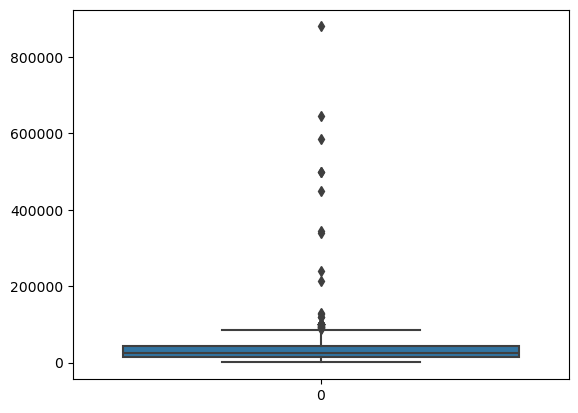

In [123]:
# 5. What is the average km_driven value for each ownership type?
sns.boxplot(df['km_driven'])

In [124]:
#before removing outlier:avg km driven by owner
avg_km_by_owners=df.groupby("owner")['km_driven'].mean()

In [125]:
avg_km_by_owners

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64

In [126]:
Q1=df['km_driven'].quantile(.25)
Q3=df['km_driven'].quantile(.75)
IQR=Q3-Q1

upper_bound=Q1-1.5*IQR
lower_bound=Q3+1.5*IQR

In [127]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].apply(lambda x: np.nan if x < lower_bound or x > upper_bound else x)

In [128]:
for col in numeric_columns:
    df[col]=df[col].fillna(df[col].mean())

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   float64
 2   year               1061 non-null   float64
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   float64
 6   ex_showroom_price  1061 non-null   float64
dtypes: float64(4), object(3)
memory usage: 58.2+ KB


In [130]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,47702.339836,2019.0,Individual,1st owner,350.0,70148.122966
1,Honda Dio,45000.000000,2017.0,Individual,1st owner,5650.0,70148.122966
2,Royal Enfield Classic Gunmetal Grey,47702.339836,2018.0,Individual,1st owner,12000.0,70148.122966
3,Yamaha Fazer FI V 2.0 [2016-2018],65000.000000,2015.0,Individual,1st owner,23000.0,89643.000000
4,Yamaha SZ [2013-2014],20000.000000,2011.0,Individual,2nd owner,21000.0,70148.122966


In [131]:
#after removing outlier and replacing with mean value:avg km driven by owner
avg_km_by_owners=df.groupby("owner")['km_driven'].mean()

In [132]:
avg_km_by_owners

owner
1st owner    27424.394272
2nd owner    33615.987765
3rd owner    33292.181818
4th owner    27567.805284
Name: km_driven, dtype: float64

In [135]:
# 6. What proportion of bikes are from the year 2015 or older?
prop_2015_older = df[df['year'] <= 2015].shape[0] / df.shape[0]
print(f"Proportion of bikes from 2015 or older: {prop_2015_older:.2%}")

Proportion of bikes from 2015 or older: 56.64%


In [137]:
df.shape[0]

1061

In [143]:
# 7. What is the trend of missing values across the dataset?
df=pd.read_csv("BIKE DETAILS.csv")

missing_values = df.isnull().sum()
print(missing_values)

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [145]:
# 8. What is the highest ex_showroom_price recorded, and for which bike?
highest_price_bike = df['ex_showroom_price'].max()
bikes=df['name'][df['ex_showroom_price']==df['ex_showroom_price'].max()]

name                 Harley-Davidson Street Bob
ex_showroom_price                     1278000.0
Name: 134, dtype: object


In [153]:
highest_price_bike

1278000.0

In [154]:
bikes

134    Harley-Davidson Street Bob
Name: name, dtype: object

In [155]:
# 9. What is the total number of bikes listed by each seller type?
bikes_by_seller = df['seller_type'].value_counts()
prbikes_by_seller

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


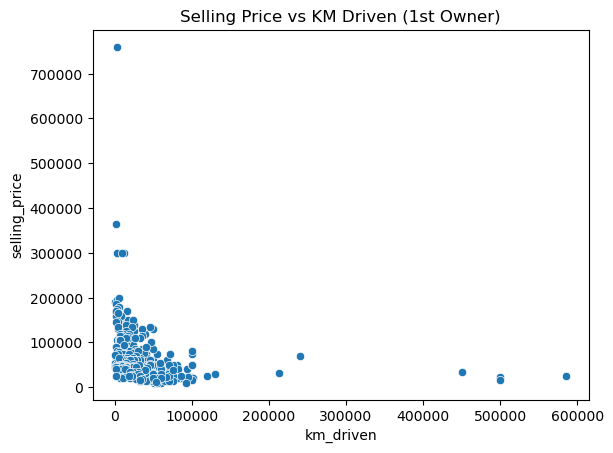

In [159]:
# 10. What is the relationship between selling_price and km_driven for first-owner bikes?
required=df[df['owner'] == '1st owner']
sns.scatterplot(data=required.dropna(), x='km_driven', y='selling_price')
plt.title('Selling Price vs KM Driven (1st Owner)')
plt.show()

In [157]:
data=df[df['owner'] == '1st owner']

In [160]:
data.dropna()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0
...,...,...,...,...,...,...,...
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [161]:
# 11. Identify and remove outliers in the km_driven column using the IQR method.
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

In [162]:
df_cleaned.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


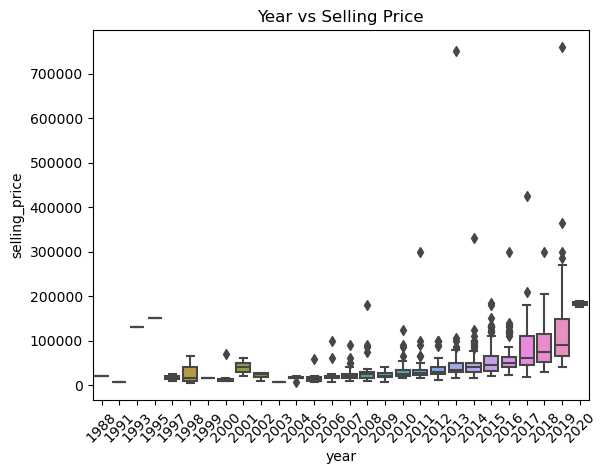

In [163]:
# 12. Perform a bivariate analysis to visualize the relationship between year and selling_price.
sns.boxplot(data=df, x='year', y='selling_price')
plt.xticks(rotation=45)
plt.title('Year vs Selling Price')
plt.show()

In [167]:
# 13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?
current_year = 2025
df['age'] = current_year - df['year']
df['depreciation']=df['ex_showroom_price'] - df['selling_price']
avg_depreciation = df.groupby('age')['depreciation'].mean()
print(avg_depreciation)

age
5    -34260.000000
6      2954.562500
7     13023.194805
8     22306.082353
9     28328.190476
10    28013.275000
11    34505.606061
12    43086.886792
13    37317.648649
14    47102.666667
15    45658.928571
16    38227.785714
17    54732.428571
18    42399.000000
19    39664.500000
20    44852.000000
21    36852.000000
22             NaN
23             NaN
24    34852.000000
25             NaN
26             NaN
27             NaN
28             NaN
30             NaN
32             NaN
34             NaN
37             NaN
Name: depreciation, dtype: float64


In [168]:
know=df['name'][df['depreciation']==-34260.000000]

In [169]:
know

136    Royal Enfield Classic Gunmetal Grey
Name: name, dtype: object

In [170]:
# 14. Which bike names are priced significantly above the average price for their manufacturing year?
avg_price_per_year = df.groupby('year')['selling_price'].mean()
outliers = df[df['selling_price'] > 1.5 * df['year'].map(avg_price_per_year)]
print(outliers[['name', 'selling_price', 'year']])

                                     name  selling_price  year
2     Royal Enfield Classic Gunmetal Grey         150000  2018
7    Royal Enfield Bullet 350 [2007-2011]         180000  2008
13                          Yamaha YZF R3         365000  2019
18    Royal Enfield Classic Gunmetal Grey         150000  2018
23                          Jawa Standard         180000  2019
..                                    ...            ...   ...
979             Royal Enfield Thunder 500         105000  2015
981             Royal Enfield Thunder 350         105000  2013
983             Royal Enfield Classic 350         100000  2015
984             Royal Enfield Classic 500          95000  2014
985             Royal Enfield Classic 500          90000  2011

[157 rows x 3 columns]


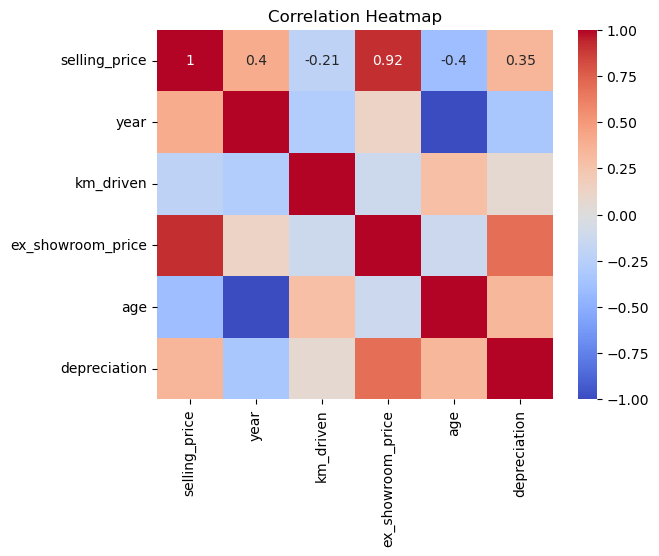

In [173]:
# 15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# car sale EDA
# 15 questions 

In [3]:
df2=pd.read_csv("car sale.csv")

In [ ]:
# 1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?
avg_price_per_dealer = df2.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)
avg_price_per_dealer.plot(kind='bar', figsize=(12, 6))
plt.title('Average Selling Price of Cars by Dealer')
plt.ylabel('Average Price ($)')
plt.xlabel('Dealer Name')
plt.show()

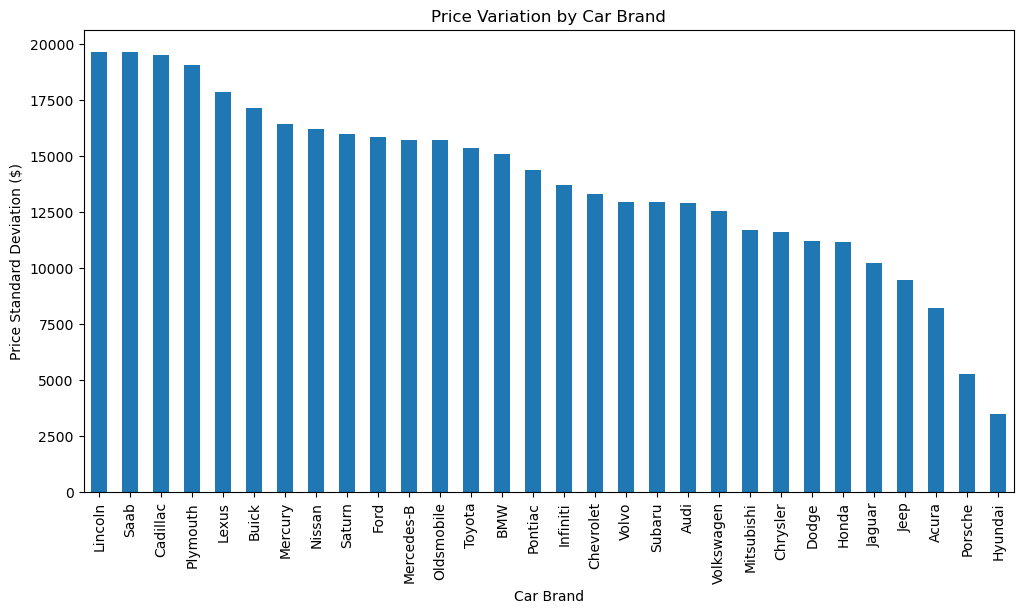

In [5]:
# 2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
price_variation_by_company = df2.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
price_variation_by_company.plot(kind='bar', figsize=(12, 6))
plt.title('Price Variation by Car Brand')
plt.ylabel('Price Standard Deviation ($)')
plt.xlabel('Car Brand')
plt.show()

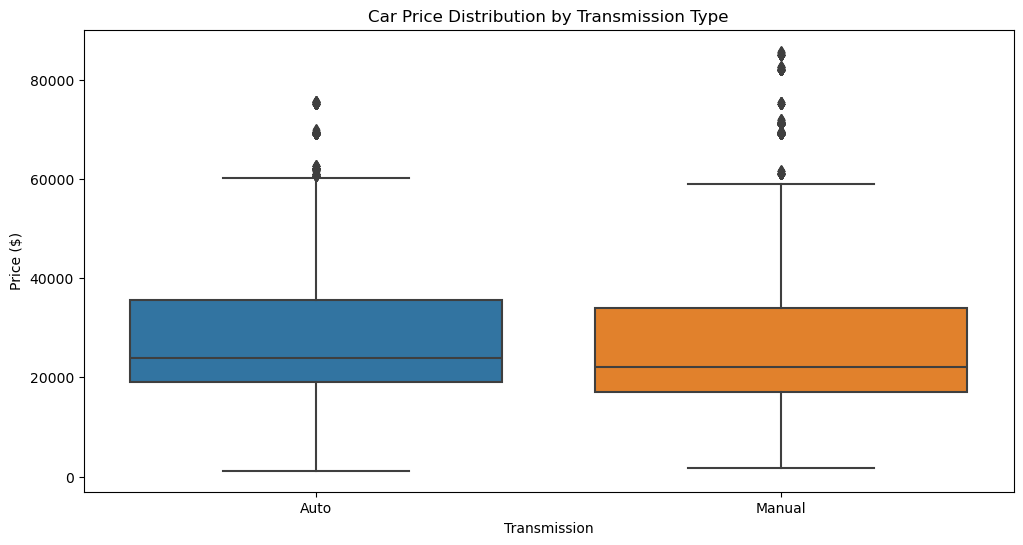

In [6]:
# 3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
plt.figure(figsize=(12, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=df2)
plt.title('Car Price Distribution by Transmission Type')
plt.show()


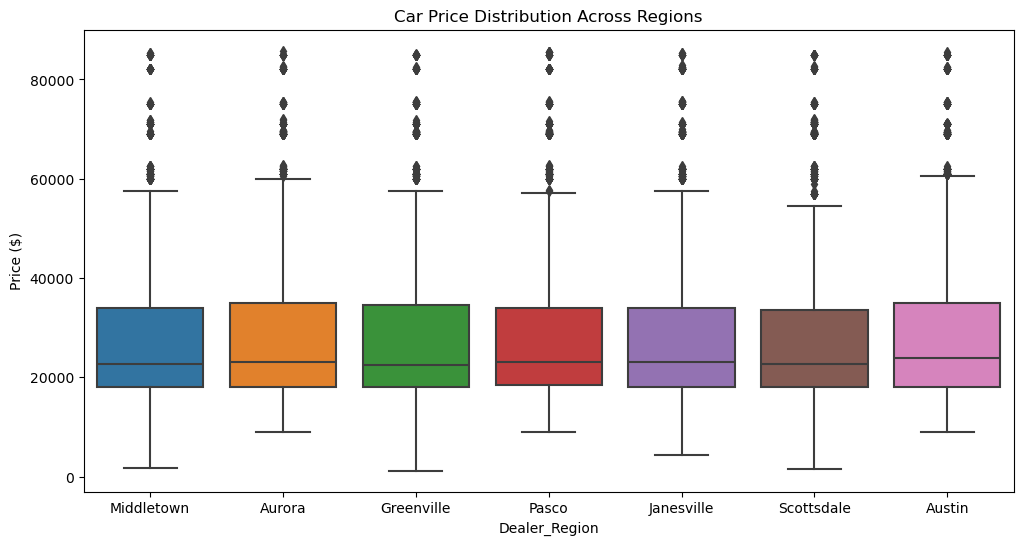

In [7]:
# 4. What is the distribution of car prices across different regions?
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df2)
plt.title('Car Price Distribution Across Regions')
plt.show()

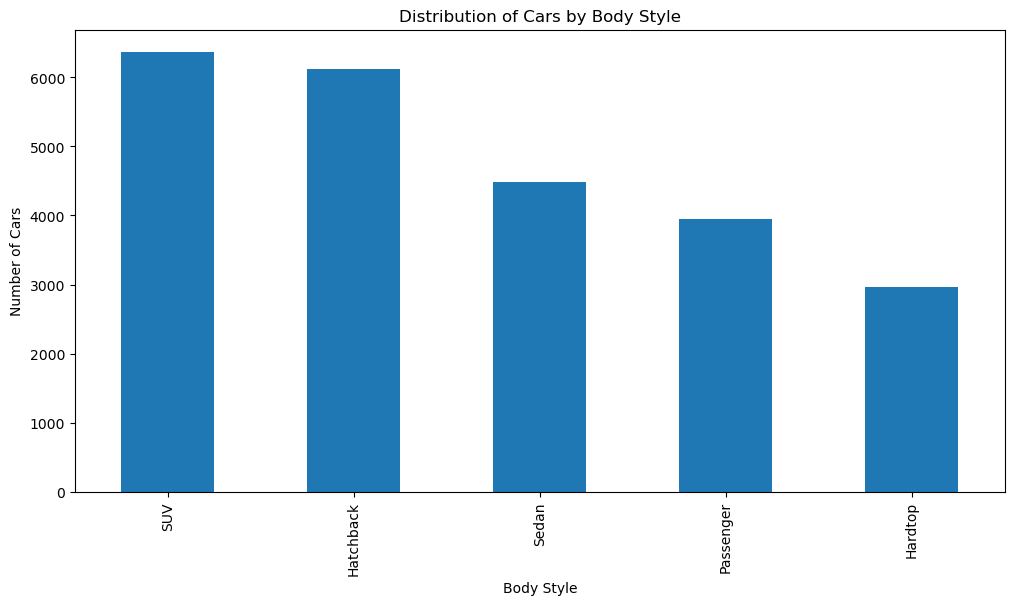

In [8]:
# 5. What is the distribution of cars based on body styles?
body_style_counts = df2['Body Style'].value_counts()
body_style_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Distribution of Cars by Body Style')
plt.ylabel('Number of Cars')
plt.xlabel('Body Style')
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_25880\3530217426.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_gender_income = df2.groupby(['Gender', 'Income_Bracket'])['Price ($)'].mean().unstack()


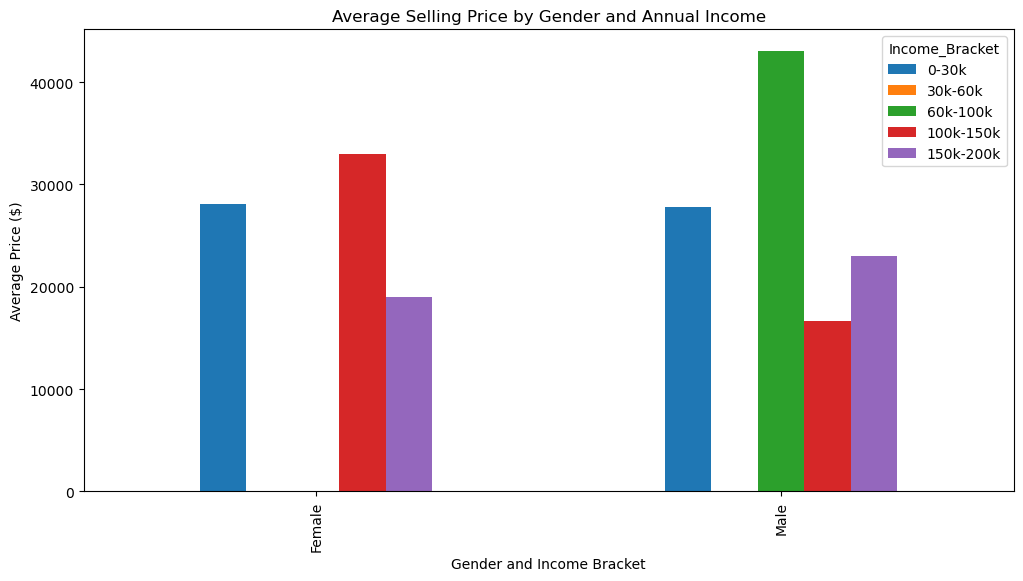

In [18]:
# 6. How does the average selling price of cars vary by customer gender and annual income?
df2['Income_Bracket'] = pd.cut(df2['Annual Income'], bins=[0, 30000, 60000, 100000, 150000, 200000], labels=["0-30k", "30k-60k", "60k-100k", "100k-150k", "150k-200k"])
avg_price_by_gender_income = df2.groupby(['Gender', 'Income_Bracket'])['Price ($)'].mean().unstack()
avg_price_by_gender_income.plot(kind='bar', figsize=(12, 6))
plt.title('Average Selling Price by Gender and Annual Income')
plt.ylabel('Average Price ($)')
plt.xlabel('Gender and Income Bracket')
plt.show()

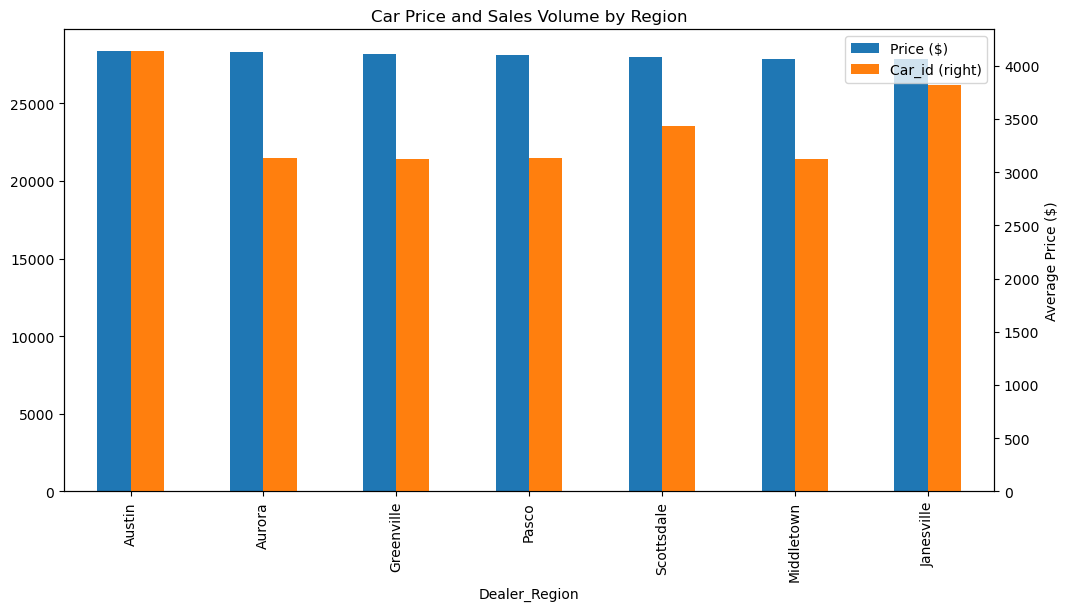

In [19]:
# 7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?
region_stats = df2.groupby('Dealer_Region').agg({'Price ($)': 'mean', 'Car_id': 'count'}).sort_values(by='Price ($)', ascending=False)
region_stats.plot(kind='bar', figsize=(12, 6), secondary_y='Car_id')
plt.title('Car Price and Sales Volume by Region')
plt.ylabel('Average Price ($)')
plt.show()

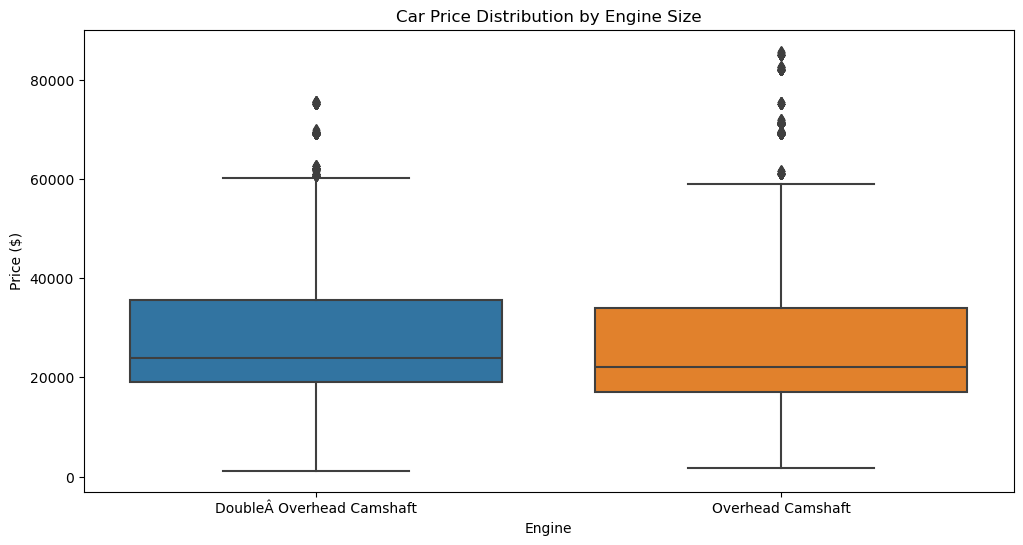

In [20]:
# 8. How does the average car price differ between cars with different engine sizes?
plt.figure(figsize=(12, 6))
sns.boxplot(x='Engine', y='Price ($)', data=df2)
plt.title('Car Price Distribution by Engine Size')
plt.show()

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


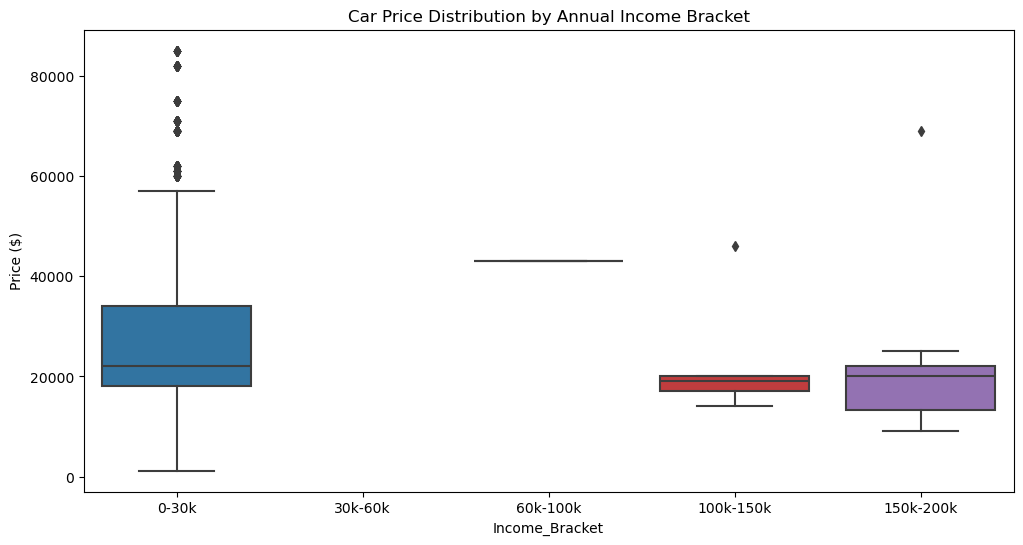

In [21]:
# 9. How do car prices vary based on the customer’s annual income bracket?
plt.figure(figsize=(12, 6))
sns.boxplot(x='Income_Bracket', y='Price ($)', data=df2)
plt.title('Car Price Distribution by Annual Income Bracket')
plt.show()

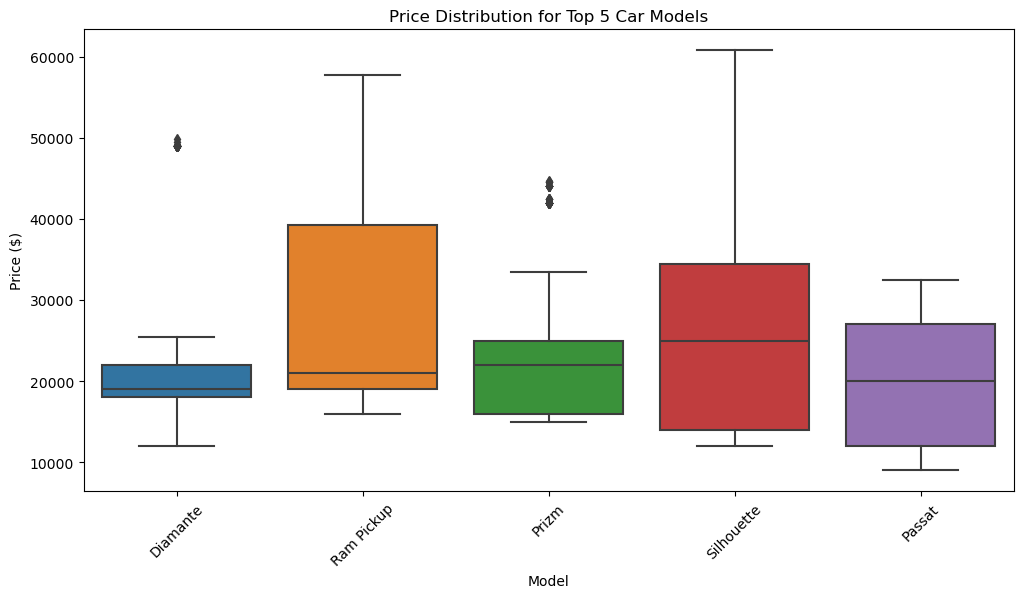

In [15]:
# 10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?
top_models = df2['Model'].value_counts().head(5)
top_models_df = df2[df2['Model'].isin(top_models.index)]
plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='Price ($)', data=top_models_df)
plt.title('Price Distribution for Top 5 Car Models')
plt.xticks(rotation=45)
plt.show()

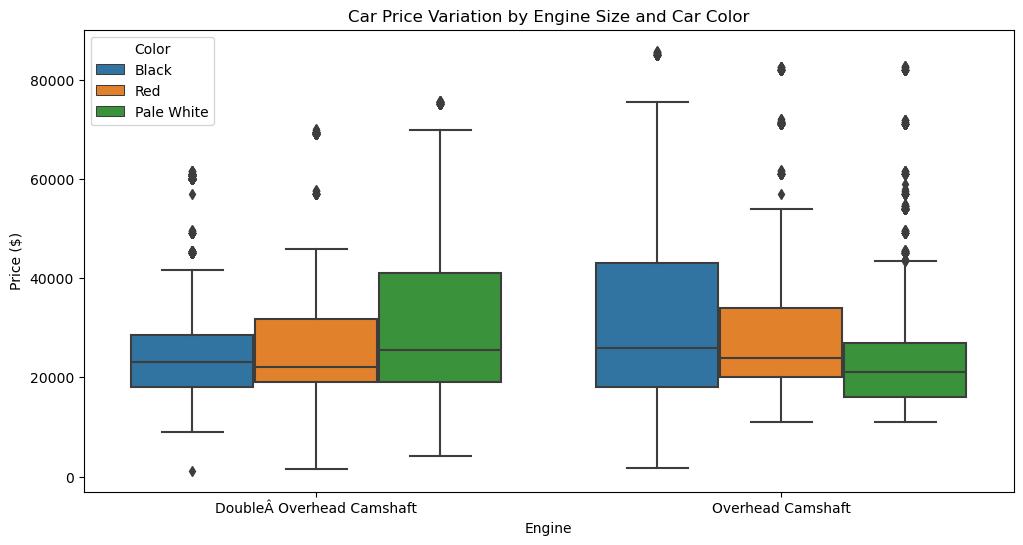

In [11]:
# 11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?
plt.figure(figsize=(12, 6))
sns.boxplot(x='Engine', y='Price ($)', hue='Color', data=df2)
plt.title('Car Price Variation by Engine Size and Car Color')
plt.show()

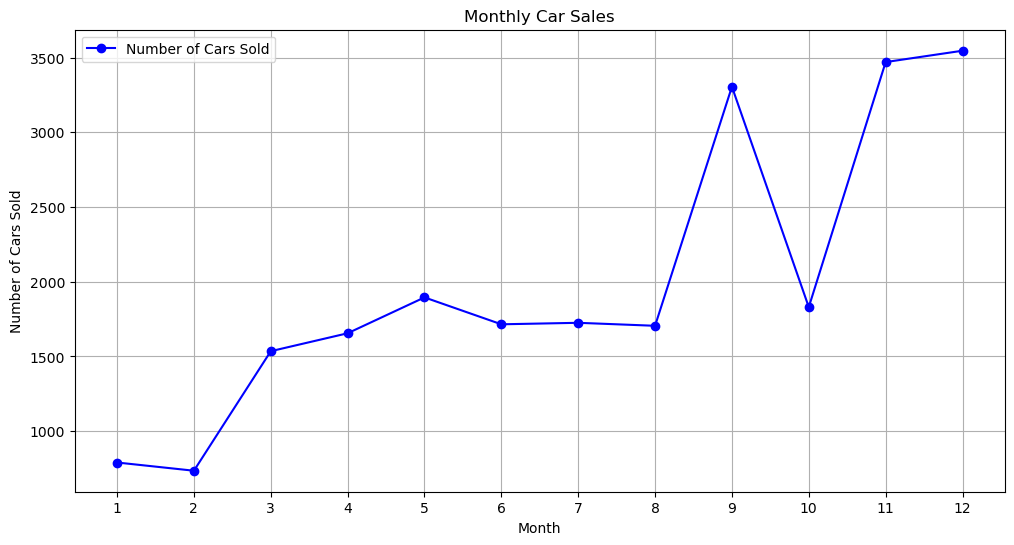

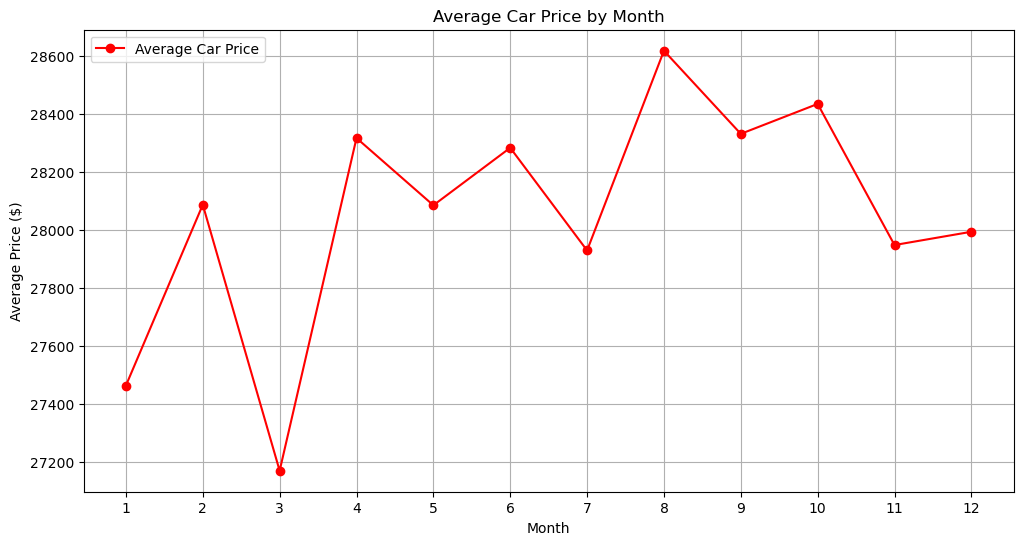

In [12]:
# 12. Is there any seasonal trend in car sales based on the date of sale?
# We will check for:
# - Monthly car sales: How many cars are sold each month.
# - Average car price by month: Is there a change in the average price of cars throughout the year?

# Convert 'Date' to datetime if it's not already
df2['Date'] = pd.to_datetime(df2['Date'])

# Extract the month from the date of sale
df2['Month'] = df2['Date'].dt.month

# 1. Monthly car sales (number of cars sold each month)
monthly_sales = df2.groupby('Month')['Car_id'].count()

# 2. Average car price by month (showing price variation by month)
avg_price_month = df2.groupby('Month')['Price ($)'].mean()

# Plot monthly sales
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='b', label='Number of Cars Sold')
plt.title('Monthly Car Sales')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

# Plot average price by month
plt.figure(figsize=(12, 6))
avg_price_month.plot(kind='line', marker='o', color='r', label='Average Car Price')
plt.title('Average Car Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price ($)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend(loc='upper left')
plt.show()


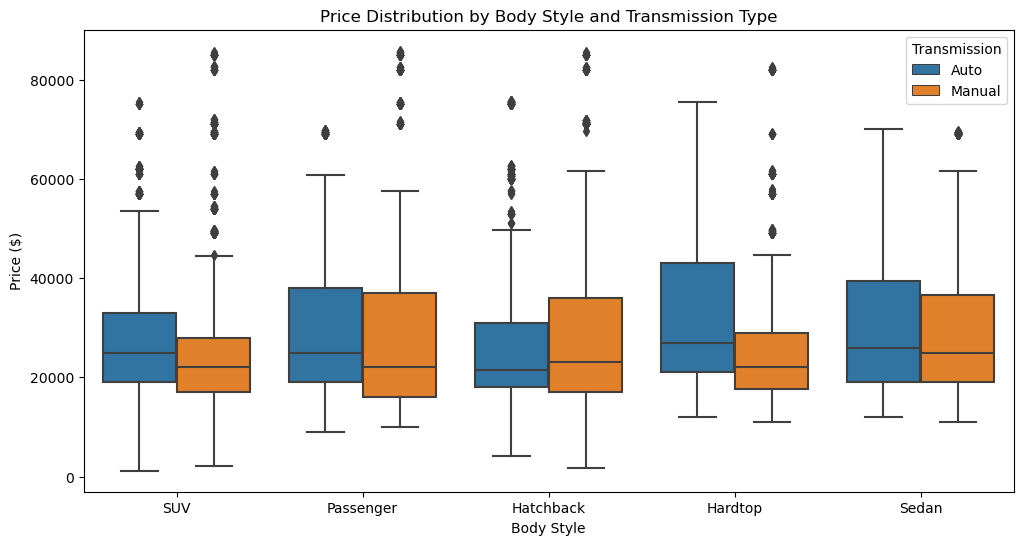

In [13]:
# 13. How does the car price distribution change when considering different combinations of body style and transmission type?
plt.figure(figsize=(12, 6))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df2)
plt.title('Price Distribution by Body Style and Transmission Type')
plt.show()

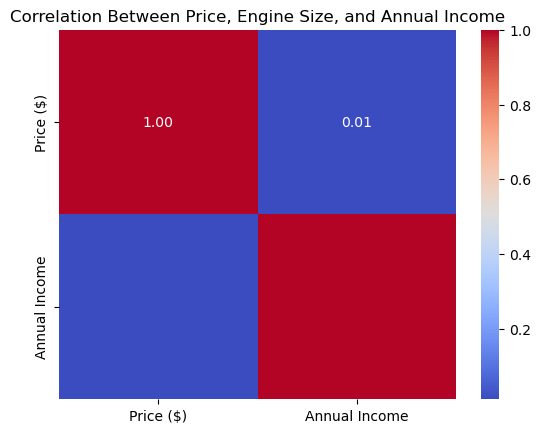

In [31]:
# 14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
correlation = df2[['Price ($)','Annual Income']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Price, Engine Size, and Annual Income')
plt.show()

In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Car_id          23906 non-null  object        
 1   Date            23906 non-null  datetime64[ns]
 2   Customer Name   23905 non-null  object        
 3   Gender          23906 non-null  object        
 4   Annual Income   23906 non-null  int64         
 5   Dealer_Name     23906 non-null  object        
 6   Company         23906 non-null  object        
 7   Model           23906 non-null  object        
 8   Engine          23906 non-null  object        
 9   Transmission    23906 non-null  object        
 10  Color           23906 non-null  object        
 11  Price ($)       23906 non-null  int64         
 12  Dealer_No       23906 non-null  object        
 13  Body Style      23906 non-null  object        
 14  Phone           23906 non-null  int64         
 15  De

In [33]:
df2.Engine

0        DoubleÂ Overhead Camshaft
1        DoubleÂ Overhead Camshaft
2                Overhead Camshaft
3                Overhead Camshaft
4        DoubleÂ Overhead Camshaft
                   ...            
23901            Overhead Camshaft
23902    DoubleÂ Overhead Camshaft
23903            Overhead Camshaft
23904    DoubleÂ Overhead Camshaft
23905    DoubleÂ Overhead Camshaft
Name: Engine, Length: 23906, dtype: object

Unique values in 'Engine' column: ['DoubleÂ\xa0Overhead Camshaft' 'Overhead Camshaft']


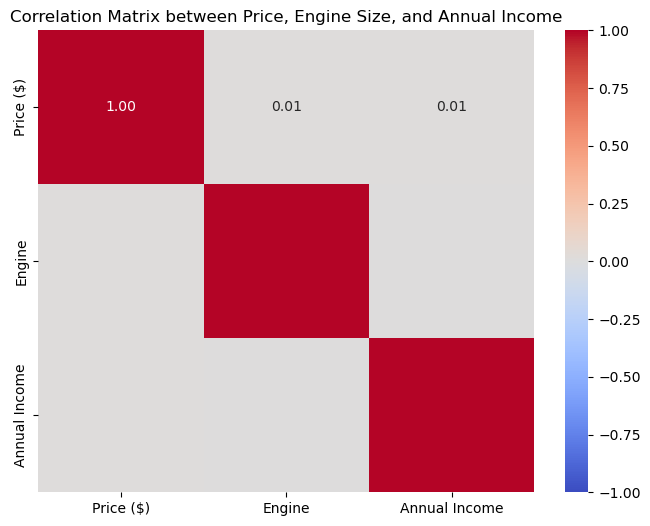

In [35]:
# Step 1: Inspect unique engine descriptions to identify encoding issues and general patterns
unique_engine_values = df2['Engine'].unique()
print("Unique values in 'Engine' column:", unique_engine_values)

# Step 2: Clean the engine descriptions by fixing encoding issues (if any)
# Fix potential encoding problems (e.g., "DoubleÂ Overhead Camshaft" -> "Double Overhead Camshaft")
df2['Engine'] = df2['Engine'].str.replace(r'\xa0', ' ', regex=True)  # Fix non-breaking space character
df2['Engine'] = df2['Engine'].str.replace(r'\u00c2', '', regex=True)  # Remove any unwanted characters like 'Â'

# Step 3: Handle engine descriptions and map them to numeric values
# Map the cleaned engine descriptions to numbers (This depends on your data; you might need to adjust this)
engine_mapping = {
    'Overhead Camshaft': 4,  # Assuming 4 cylinders
    'Double Overhead Camshaft': 6,  # Assuming 6 cylinders for "Double Overhead"
    'Inline 4': 4,  # Inline 4 cylinders
    'V6': 6,  # V6 engine
    'V8': 8,  # V8 engine
    'V12': 12,  # V12 engine
    'I6': 6,  # Inline 6 engine
    'Unknown': None  # Any unknown engine types will be mapped to NaN
}

# Apply the mapping to the 'Engine' column
df2['Engine'] = df2['Engine'].map(engine_mapping)

# Step 4: Handle rows with missing engine data (if needed)
# You can either drop rows with NaN values or replace them with a placeholder value like 'Unknown'
df2 = df2.dropna(subset=['Engine'])

# Step 5: Now, you can proceed with the correlation analysis or further steps
# Calculate the correlation between 'Price ($)', 'Engine', and 'Annual Income'
correlation = df2[['Price ($)', 'Engine', 'Annual Income']].corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix between Price, Engine Size, and Annual Income')
plt.show()


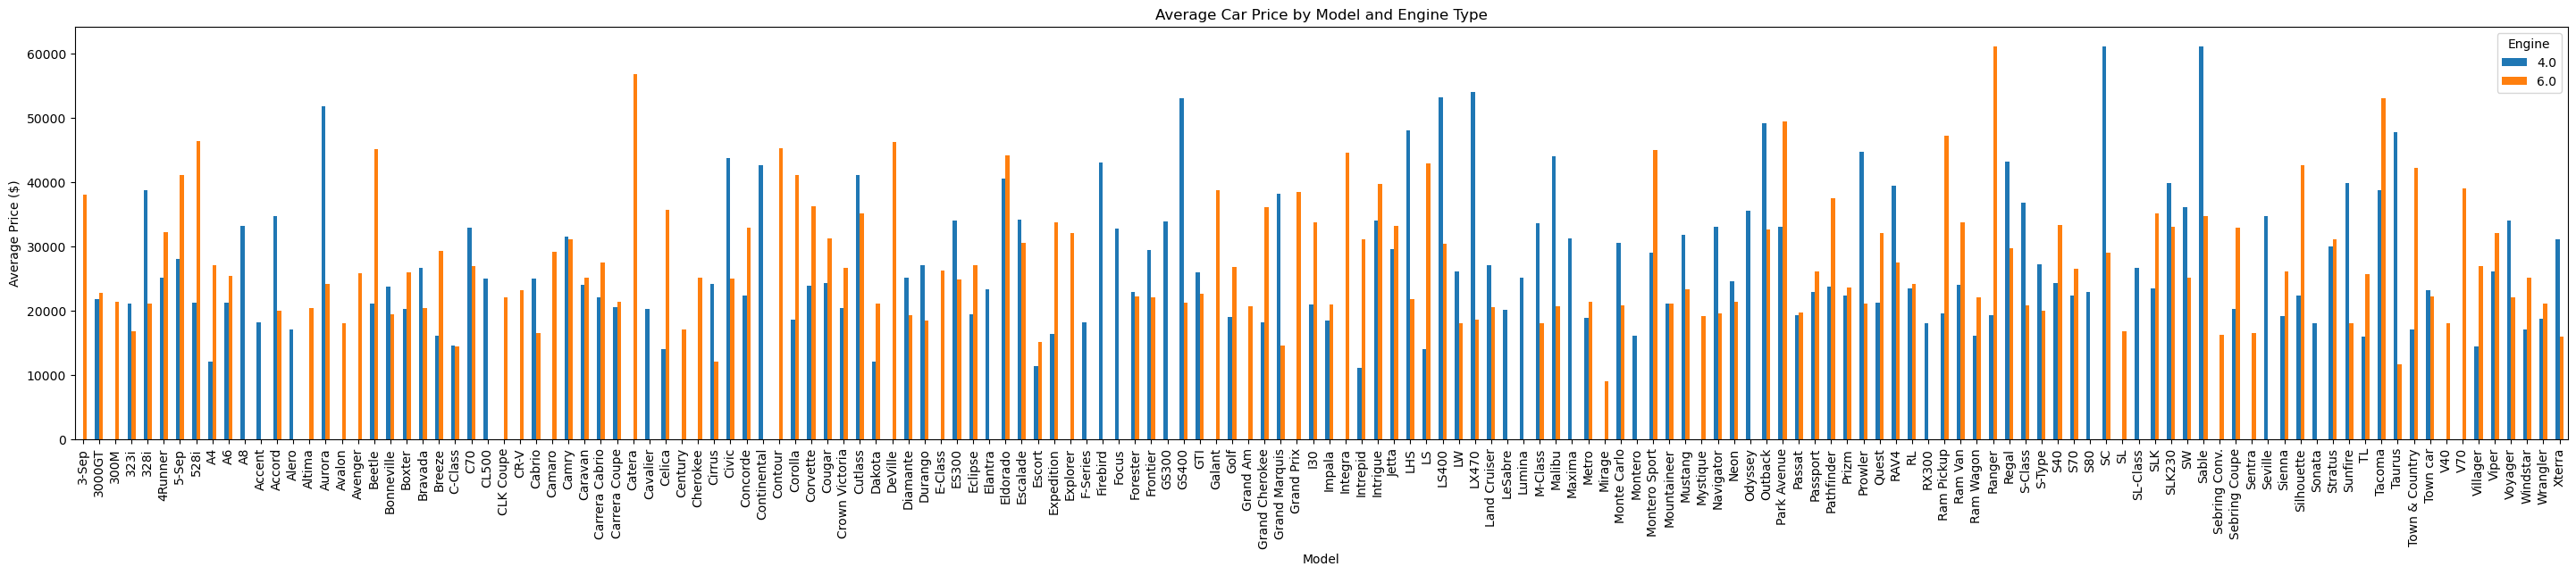

In [38]:
# 15. How does the average car price vary across different car models and engine types?
avg_price_by_model_engine = df2.groupby(['Model','Engine'])['Price ($)'].mean().unstack()
avg_price_by_model_engine.plot(kind='bar', figsize=(36, 6))
plt.title('Average Car Price by Model and Engine Type')
plt.ylabel('Average Price ($)')
plt.show()

# Amazon Sales EDA
# 10 Questions

In [32]:
df3=pd.read_csv("amazon.csv")

In [33]:
df3.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [34]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [35]:
df3.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


In [36]:
# converting dtype of discounted_price	actual_price	discount_percentage	rating	rating_count from object to int/float
df3.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [37]:
# Convert relevant columns from object to numeric
df3['discounted_price'] = df3['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df3['actual_price'] = df3['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df3['rating'] = pd.to_numeric(df3['rating'], errors='coerce')
df3['rating_count'] = df3['rating_count'].str.replace(',', '').astype(float)

# Remove '%' sign from the discount_percentage column and convert it to numeric
df3['discount_percentage'] = df3['discount_percentage'].str.replace('%', '').astype(float)

In [38]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [39]:
df3.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [26]:
# 1. Average Rating for Each Product Category (Q1)
avg_rating_by_category = df3.groupby('category')['rating'].mean().sort_values(ascending=False)

In [27]:
avg_rating_by_category

category
Computers&Accessories|Tablets                                                                                    4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                                         4.5
Electronics|Cameras&Photography|Accessories|Film                                                                 4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                                     4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                                                               4.5
                                                                                                                ... 
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                               3.6
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.5
Computers&Accessories|Accessories&Peripherals|Audio&Vid

In [43]:
# 2. Top Rating Count Products by Category (Q2)
df3['rating_count'] = df3['rating_count'].fillna(df3['rating_count'].mean())
top_rating_count = df3.groupby('category')['rating_count'].mean().sort_values(ascending=False)

In [44]:
print(df3['rating_count'].dtype)

float64


In [45]:
top_rating_count.head()

category
Home&Kitchen|Kitchen&Dining|KitchenTools|ManualChoppers&Chippers|Choppers    270563.000000
Computers&Accessories|NetworkingDevices|NetworkAdapters|BluetoothAdapters     95116.000000
Electronics|Accessories|MemoryCards|MicroSD                                   85660.923077
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                  80864.211538
Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables                79418.916667
Name: rating_count, dtype: float64

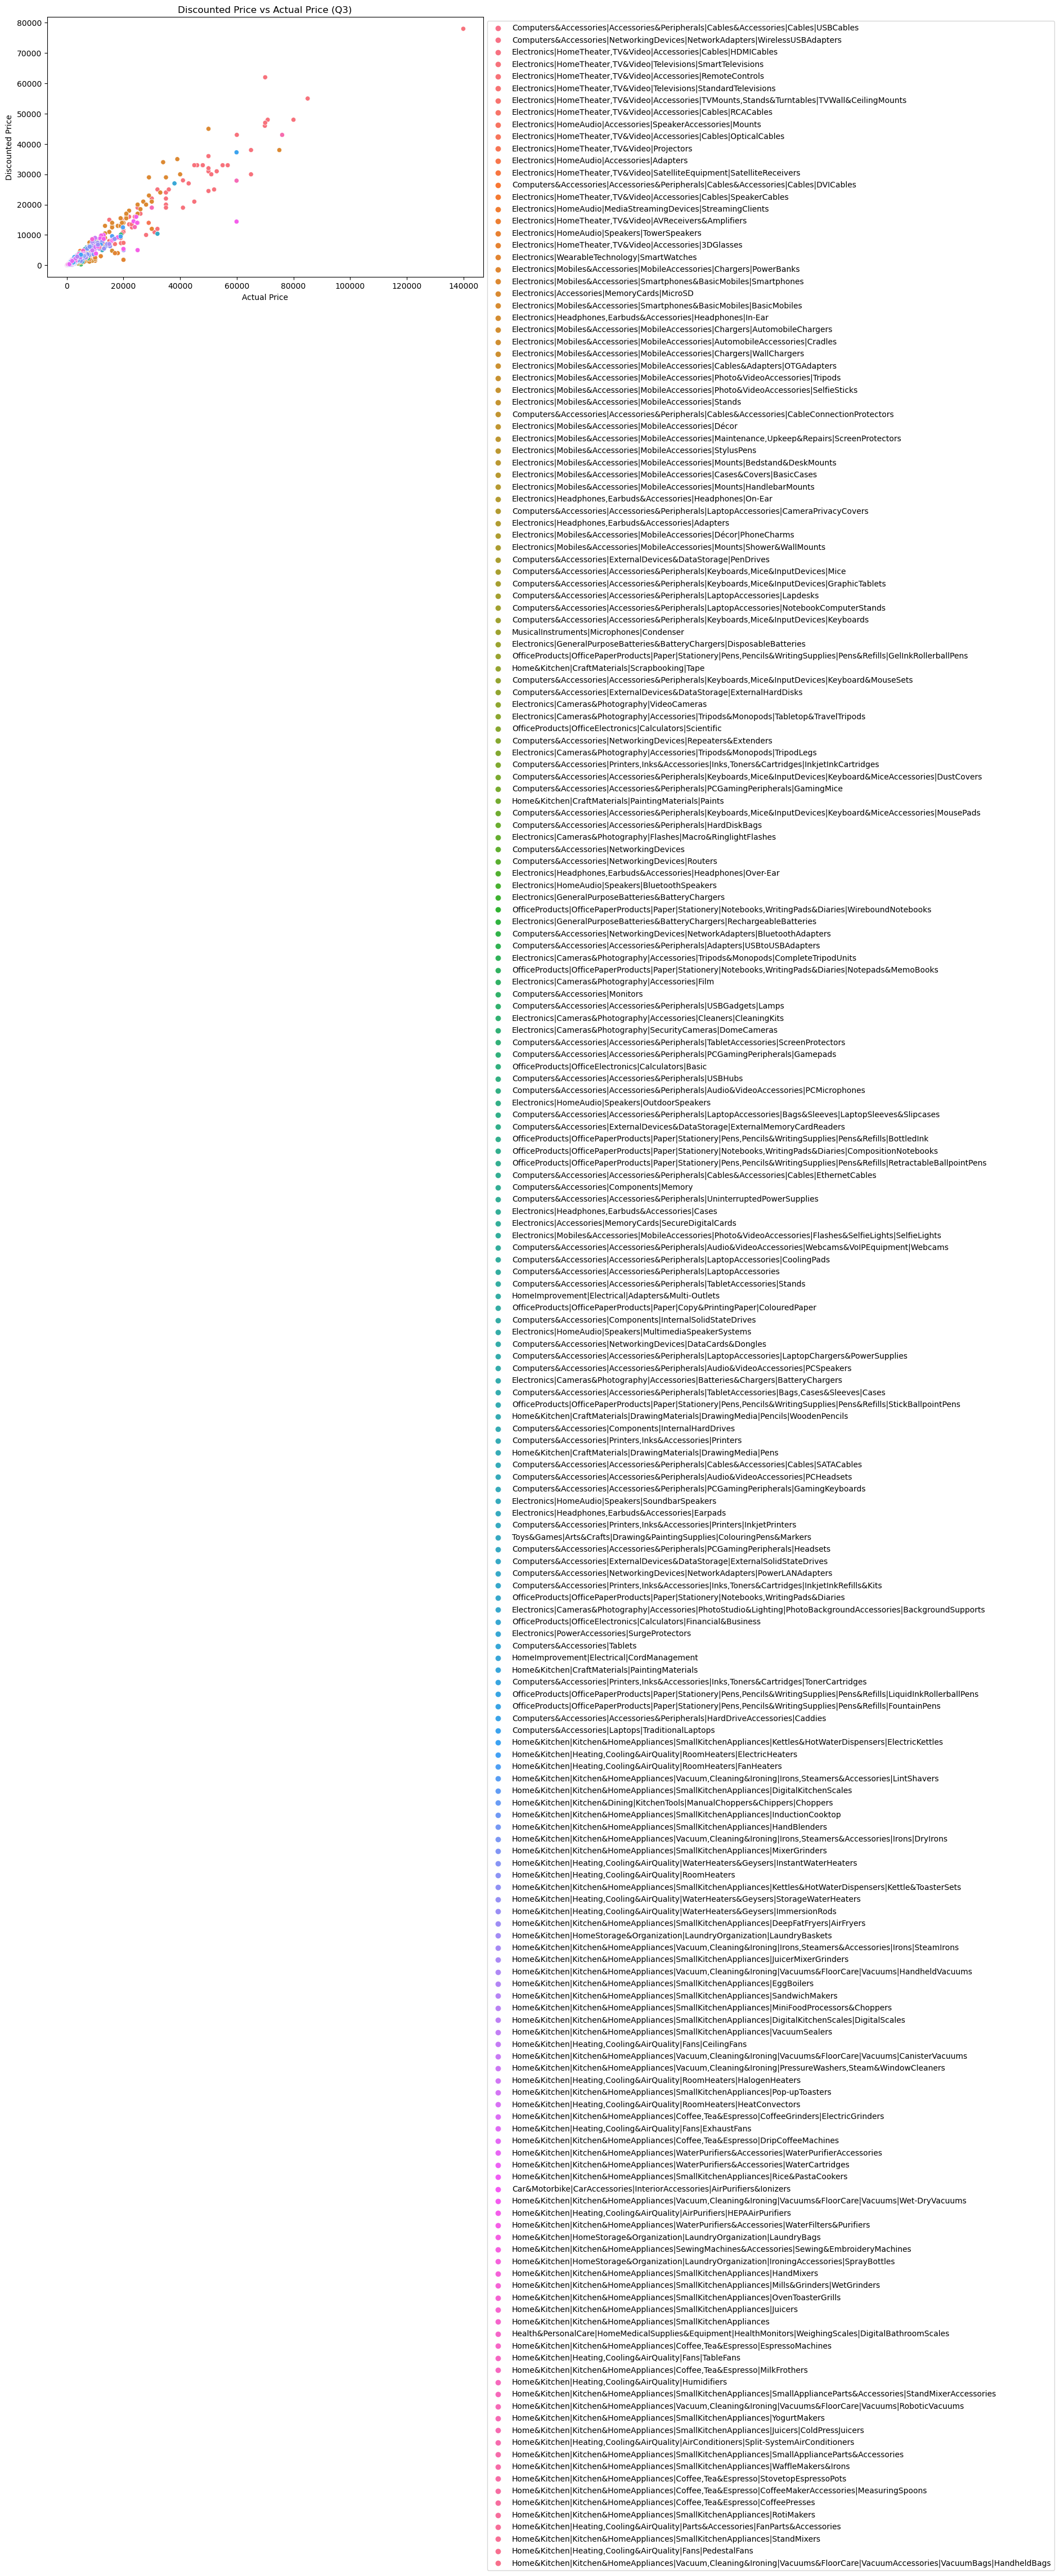

In [46]:
# 3. Distribution of Discounted Prices vs Actual Prices (Q3)
filtered_data = df3.dropna(subset=['actual_price', 'discounted_price'])
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='actual_price', y='discounted_price', hue='category')
plt.title("Discounted Price vs Actual Price (Q3)")
plt.xlabel("Actual Price")
plt.ylabel("Discounted Price")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [47]:
# 4. Average Discount Percentage by Category (Q4)
avg_discount_by_category = df3.groupby('category')['discount_percentage'].mean()

In [48]:
avg_discount_by_category

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    42.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   78.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           35.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        56.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           46.5
                                                                                                                          ... 
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens         0.0
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidIn

In [49]:
# 5. Most Popular Product Names (Q5)
most_popular_products = df3.groupby('product_name')['rating_count'].sum().sort_values(ascending=False)

In [50]:
most_popular_products

product_name
AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot                                                                                                                                853945.0
Amazon Basics High-Speed HDMI Cable, 6 Feet (2-Pack),Black                                                                                                                                               426973.0
Amazon Basics High-Speed HDMI Cable, 6 Feet - Supports Ethernet, 3D, 4K video,Black                                                                                                                      426973.0
JBL C100SI Wired In Ear Headphones with Mic, JBL Pure Bass Sound, One Button Multi-function Remote, Angled Buds for Comfort fit (Black)                                                                  385177.0
boAt Bassheads 100 in Ear Wired Earphones with Mic(Furious Red)                                                                                    

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

In [52]:
# 6. Most Popular Product Keywords (Q6)
df3['about_product'] = df3['about_product'].fillna('')
vectorizer = CountVectorizer(stop_words='english', max_features=20)
keywords_matrix = vectorizer.fit_transform(df3['about_product'])
popular_keywords = vectorizer.get_feature_names_out()

In [53]:
popular_keywords

array(['10', 'cable', 'charge', 'charging', 'compatible', 'design',
       'devices', 'display', 'easy', 'fast', 'free', 'high', 'power',
       'product', 'speed', 'type', 'usb', 'use', 'warranty', 'water'],
      dtype=object)

In [55]:
# 7. Most Popular Product Reviews (Q7)
most_popular_reviews = df3.dropna(subset=['review_id']).groupby('review_id').apply(lambda x: x.nlargest(1, 'rating_count'))

In [58]:
most_popular_reviews.head()

,,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
review_id,,,,,,,,,,,,,,,,,
"R10365HEDURWI9,R5RP542IMC4OI,RX2HFWXTTQDTS,R2636VYPMOZV9,RW2Z2YM3K8UV5,RVNGA0FEAXYHI,R2K7MABWMAQE26,R33YS4PO3JWU23",84,B07GVGTSLN,Wayona Usb Type C Fast Charger Cable Fast Char...,Computers&Accessories|Accessories&Peripherals|...,325.0,1299.0,75.0,4.2,10576.0,Fast Charge & Data Sync: Fast charge& data tra...,"AEXK37TSBFHSP2TYE63YPKETWQ7Q,AEKMVX2VDNNX4ZFXI...","Sunil Funde,Biju Abraham Thomas,Samir,Rahul Sh...","R10365HEDURWI9,R5RP542IMC4OI,RX2HFWXTTQDTS,R26...","Nice product .,Good quality Braided cable, VFM...","Sturdy packing, good product!,Have used this b...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Cable-Braided-Cha...
"R10758I9J937X1,R2QT07V4QXKIFY,R2BLT775YXVSXH,R3V1U8IIB8FFO2,RVBV8BEJ26OG6,R1LXTDC37JH60V,R1ICRMTTWYOFPK,R1HTJYYR59HC3S",678,B08QJJCY2Q,Tizum Mouse Pad/ Computer Mouse Mat with Anti-...,Computers&Accessories|Accessories&Peripherals|...,169.0,299.0,43.0,4.4,5176.0,9.4 Inches X 7.9 Inches) 240mm x 200mm x 2mm S...,"AG7XUAMM5BZSSPCBAQJ3YGYSIPXA,AGS6JTKZGW3L2TCNL...","Divya Nancy,Jay Mishra,Md Kalim,Saktyy,Venkat ...","R10758I9J937X1,R2QT07V4QXKIFY,R2BLT775YXVSXH,R...","Nice product,Size is not to big not to small,I...","Nice product,if you want to use your mouse for...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Notebook-MacBook-Compute...
"R10FUJSCR3VYHY,R2Y8B5LQ5HLACQ,R3BC8GS9GGMBTI,R2BO0XUUDY4ZA3,RN23FCU4EP3F3,RDGNXFM923PG4,R26PGAI8JKY8XB,R381CGOL80J2QM",466,B01F25X6RQ,Samsung Ehs64 Ehs64Avfwecinu Hands-Free Wired ...,"Electronics|Headphones,Earbuds&Accessories|Hea...",499.0,499.0,0.0,4.2,31539.0,In Ear Volume Control|Design: Canal phone|Head...,"AFTS5BKDRY7Y23B27UVBE2V6TOHA,AHRIDJXYEBQS7MXFD...","Ranit Barman,Ravi Singh,Karan Rai,Amazon Custo...","R10FUJSCR3VYHY,R2Y8B5LQ5HLACQ,R3BC8GS9GGMBTI,R...","Works well, but not for long,Good product,Good...","The sound quality is excellent for the price, ...",https://m.media-amazon.com/images/I/31FzYVC62w...,https://www.amazon.in/Samsung-Original-EHS64AV...
"R10G3GXLZIE38O,R806LMS8MHN8Y,R10XDKD7Z4R4WL,R1WTLGHP5CFLH,R1JU8Q6B3XA8CB,R3VN34M1FH4YAZ,R11NPIORD8W3HB,RHOJTWXKPNHNT",149,B09C6H53KH,Duracell Type-C To Micro 1.2M braided Sync & C...,Computers&Accessories|Accessories&Peripherals|...,368.0,699.0,47.0,4.2,387.0,1.2M Tangle Free durable tough braiding sync &...,"AG7TJLDLH3HOUPRBUFW6KNUEGO4A,AHTSVFP4GVBBXB6O7...","Sreejith ks,chetan w.,ASR,vajreshwari,Raghavan...","R10G3GXLZIE38O,R806LMS8MHN8Y,R10XDKD7Z4R4WL,R1...","Superb,Reviewing after 3 months of use,Good br...","Superb,I'm using this in my car from 3 months ...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/DURACELL-Type-C-Micro-br...
"R10I6UIAQIP9TN,R2XEWWLV1LH7KX,R3J0MEY15WI71Z,R3HJ0GBBBUGEJZ,R3TGTIJ54KHOL0,R21TUQZLYNGC0M,R1JSFOA0TD4S1A,R1KOD8YMT3FJ7I",344,B0B5LVS732,Noise Pulse Go Buzz Smart Watch Bluetooth Call...,Electronics|WearableTechnology|SmartWatches,1898.0,4999.0,62.0,4.1,10689.0,Sharp and bright display: The 1.69’’ TFT displ...,"AFGHRQK34D54OXQCRGX5K3XTR66Q,AHNRGHNIKN4JHV2RV...","Sumit Nath,Aneesh Mohan,Yogesh Badekar,Manisha...","R10I6UIAQIP9TN,R2XEWWLV1LH7KX,R3J0MEY15WI71Z,R...","Sumit Nath,For the price, it is a good purchas...",Touch screen functions well .step counting is ...,https://m.media-amazon.com/images/I/41Peg4pz7f...,https://www.amazon.in/Noise-Bluetooth-Calling-...


In [60]:
# 8. Correlation Between Discounted Price and Rating (Q8)
filtered_correlation_data = df3.dropna(subset=['discounted_price', 'rating'])
correlation = filtered_correlation_data[['discounted_price', 'rating']].corr()
correlation

,discounted_price,rating
discounted_price,1.000000,0.120337
rating,0.120337,1.000000


<Axes: >

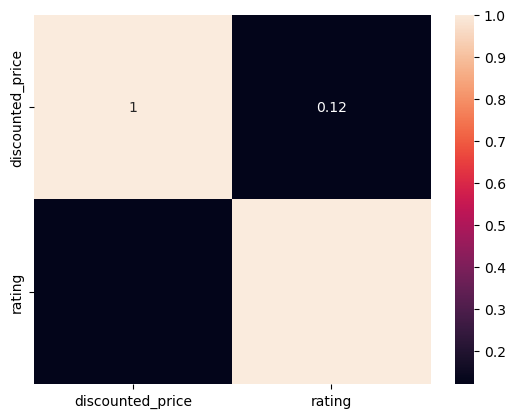

In [63]:
sns.heatmap(correlation,annot=True)

In [64]:
# 9. Top 5 Categories Based on Highest Ratings (Q9)
top_5_categories = avg_rating_by_category.head(5)

In [65]:
top_5_categories

category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                          4.5
Name: rating, dtype: float64

In [66]:
# 10. Potential Areas for Improvement or Optimization (Q10)
low_rated_categories = df3[df3['rating'] < 3].groupby('category').size()
low_discount_products = df3[df3['discount_percentage'] < 10]

In [68]:
low_discount_products.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
33,B008FWZGSG,Samsung Original Type C to C Cable - 3.28 Feet...,Computers&Accessories|Accessories&Peripherals|...,599.0,599.0,0.0,4.3,355.0,USB Type-C to Type-C cable with universal comp...,"AEQWVGESA7TDGK7KZ4DAJQGYH32A,AECGAMNNIMW5QOPOB...","Verified Buyer,Avishek Majumdar,Drowna roy,mah...","R2Z9ENI1BK4EAB,R2JTBG4GO7WPMG,R3GKCN4UH999M8,R...","Good,Genuine product,Not first charge this cab...","Buy it,Received in good condition and is worki...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Samsung-Original-Type-Ca...
138,B071VMP1Z4,LRIPL Compatible Sony Bravia LCD/led Remote Wo...,"Electronics|HomeTheater,TV&Video|Accessories|R...",399.0,399.0,0.0,3.9,1951.0,Before Order Please Match Your Remote With Ima...,"AELO5I776X3QUOQZ7AEEFC565CYA,AEJNUCP6WR35MUUPR...","Vishal Nagpal,sharmila,Amazon Customer,Ashish ...","R17PVKPPX1FJYC,R34PJA3123VAT3,R1AYZQXNSM6U7F,R...","Works like Charm,Useful,Good,Very nice,Doesn't...",The remote looks very similar to the original ...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/LRIPL-Compatible-Bravia-...
264,B09LQQYNZQ,Realme Smart TV Stick 4K,Electronics|HomeAudio|MediaStreamingDevices|St...,4699.0,4699.0,0.0,4.5,224.0,Type: HDMI|Power Requirement: DC 5 V|Number of...,"AGIZGHZQQHZLE5L3CHVG7RHBP32Q,AEQ6N6MXEZYWGKZZI...","Sayan Dutta,Harish,Saurabh Majumdar,Ajay Kumar...","R1PBLR66RA2JLZ,R2Q6NGR94WBB6N,R2DIHIFERXYMB,R3...","Great Product,Very good and working very nice,...","Everything is great. I love this.,Very good an...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Realme-Smart-TV-Stick-4K...
321,B084872DQY,Mi 80 cm (32 inches) HD Ready Android Smart LE...,"Electronics|HomeTheater,TV&Video|Televisions|S...",14999.0,14999.0,0.0,4.3,27508.0,Resolution: HD Ready Android TV (1366x768) | R...,"AG2CJB47VQE4AVBUYWE7TYPVMYHQ,AF22S3IGZ42YVFNOU...","MUNIYANDI. D,Rathod Ganesh.,Pankaj,Arulkumar M...","R1OHBRJRE6GHDZ,R24I7EFZQG9TE6,R3G0UPCD2KN4F7,R...","Nice tv,Good product,Average,No operation butt...","Good quality,Good product,Average,No operation...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Mi-inches-Ready-Android-...
337,B08HV83HL3,MI Power Bank 3i 20000mAh Lithium Polymer 18W ...,Electronics|Mobiles&Accessories|MobileAccessor...,2049.0,2199.0,7.0,4.3,178912.0,20000mAh Lithium Polymer battery|18W Fast Char...,"AG3SQH676VN5EH4NDNGVVLML6RZQ,AFOCDYODRNB2UUBOT...","Mahesh Paryani,Tejas Panchal,SUBHASH,Kushagra ...","R31BXRU0GAOB26,R120Q9PAHZEIEM,R3MSIMI8U7QZXJ,R...","Ok product to buy,Better than any other power ...",I haven’t used any other battery pack so will ...,https://m.media-amazon.com/images/I/31grUs8Opv...,https://www.amazon.in/20000mAh-Sandstone-Tripl...


In [69]:
low_rated_categories.head()

category
Electronics|WearableTechnology|SmartWatches                                       1
Home&Kitchen|Heating,Cooling&AirQuality|RoomHeaters|FanHeaters                    1
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|HandBlenders           1
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|JuicerMixerGrinders    1
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|VacuumSealers          1
dtype: int64

# Spotify data EDA
# 10 Questions

In [82]:
df4=pd.read_csv('spotify.csv')

In [83]:
df4.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [84]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [85]:
# 1. Checking for null values and duplicate rows
df4.isnull().sum() #no null value found

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

In [86]:
df4.duplicated().sum() #24 duplicate rows found

27

In [87]:
df4 = df4.drop_duplicates()

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


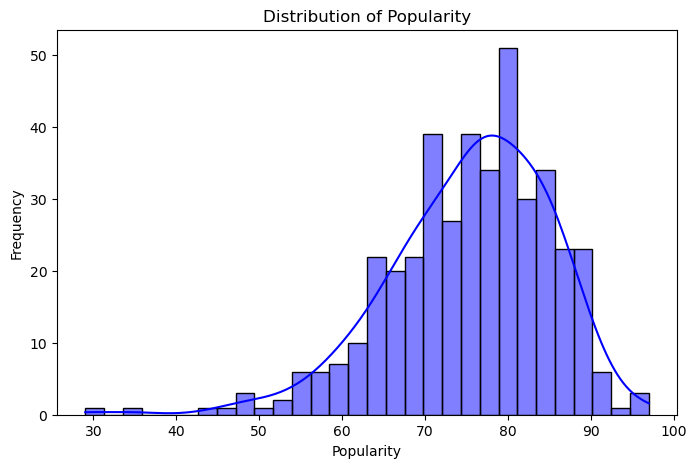

In [88]:
# 2. Distribution of Popularity
plt.figure(figsize=(8, 5))
sns.histplot(df4['Popularity'], bins=30, kde=True, color='blue')
plt.title("Distribution of Popularity")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()

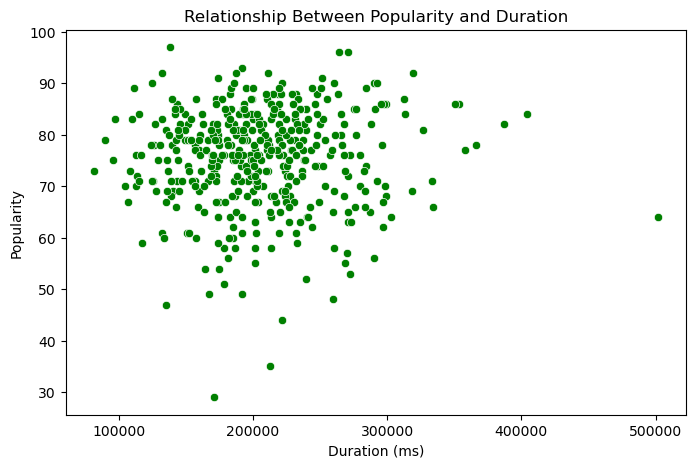

In [89]:
# 3. Relationship Between Popularity and Duration
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=df4, color='green')
plt.title("Relationship Between Popularity and Duration")
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity")
plt.show()

Artist with Highest Number of Tracks:
 Artist
Drake    17
Name: count, dtype: int64


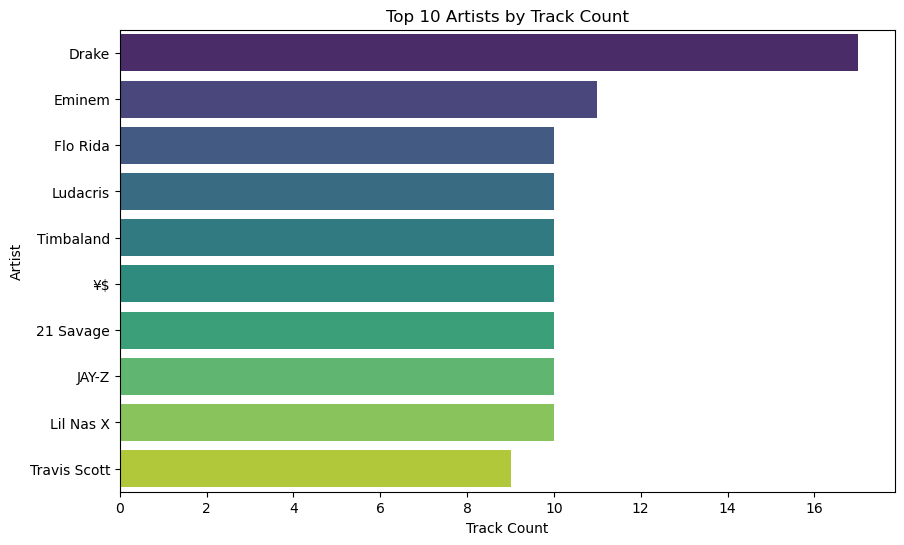

In [90]:
# 4. Artist with the Highest Number of Tracks
artist_track_count = df4['Artist'].value_counts()# 6. Top 5 Least Popular Tracks
least_popular_tracks = df4.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print("Top 5 Least Popular Tracks:\n", least_popular_tracks)
print("Artist with Highest Number of Tracks:\n", artist_track_count.head(1))
plt.figure(figsize=(10, 6))
sns.countplot(y='Artist', data=df4, order=df4['Artist'].value_counts().index[:10], palette='viridis')
plt.title("Top 10 Artists by Track Count")
plt.xlabel("Track Count")
plt.ylabel("Artist")
plt.show()

In [110]:
# 5. Top 5 Least Popular Tracks
least_popular_tracks = df4.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
least_popular_tracks

,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47
407,Wyclef Jean,911 (feat. Mary J. Blige),48


In [104]:
list_pupular_Track_Name=df4.groupby('Track Name')['Popularity'].sum().sort_values(ascending=True).head()

In [105]:
list_pupular_Track_Name

Track Name
Attachments (feat. Coi Leray)    29
Intentions                       35
Splash Brothers                  44
On Me - Remix                    47
911 (feat. Mary J. Blige)        48
Name: Popularity, dtype: int64

In [109]:
# 6. Top 5 Most Popular Artists by Average Popularity
top_artists = df4.groupby('Artist')['Popularity'].mean().sort_values(ascending=False).head(5)
top_artists

Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64

In [114]:
# 7. Most Popular Tracks for Top 5 Artists
most_popular_tracks = {}
for artist in top_artists.index:
    artist_tracks = df4[df4['Artist'] == artist]
    most_popular_track = artist_tracks.loc[artist_tracks['Popularity'].idxmax()]['Track Name']
    most_popular_tracks[artist] = most_popular_track
most_popular_track

'CARNIVAL'

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


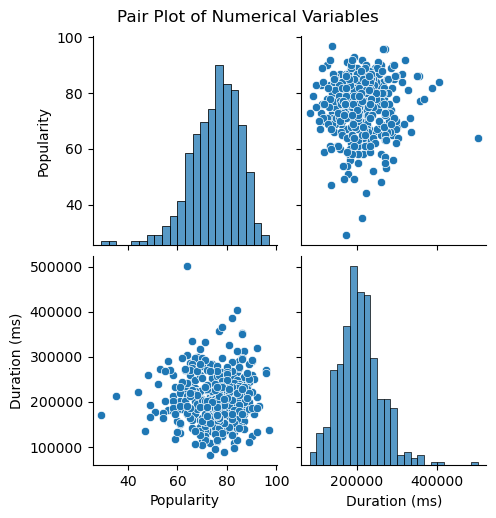

In [115]:
# 8. Pair Plot of Numerical Variables
sns.pairplot(df4[['Popularity', 'Duration (ms)']])
plt.suptitle("Pair Plot of Numerical Variables", y=1.02)
plt.show()

In [ ]:
# 9. Variation of Track Duration Across Artists
plt.figure(figsize=(12, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=df4)
plt.title("Variation of Track Duration Across Artists")
plt.xticks(rotation=90)
plt.xlabel("Artist")
plt.ylabel("Duration (ms)")
plt.show()